# Problem Statement
Based on given features we need to find whether an enployee will leave the company or not.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
data=pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Basic checks

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#memory aloocation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.shape

(1470, 35)

In [7]:
#stastistical value
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [9]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
data.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


# data preprocessing

In [11]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
data["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
#categorival columns
cat_cols=data.select_dtypes(include=("object"))
cat_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [14]:
#Numerical columns
num_cols=data.select_dtypes(include=(["int64","float64"]))
num_cols

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [15]:
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [16]:
for i in cat_cols:
    print("***********")
    print(i)
    print(data[i].unique())
    print(data[i].value_counts())

***********
Attrition
['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
***********
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
***********
Department
['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
***********
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
***********
Gender
['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
***********
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director'

# EDA

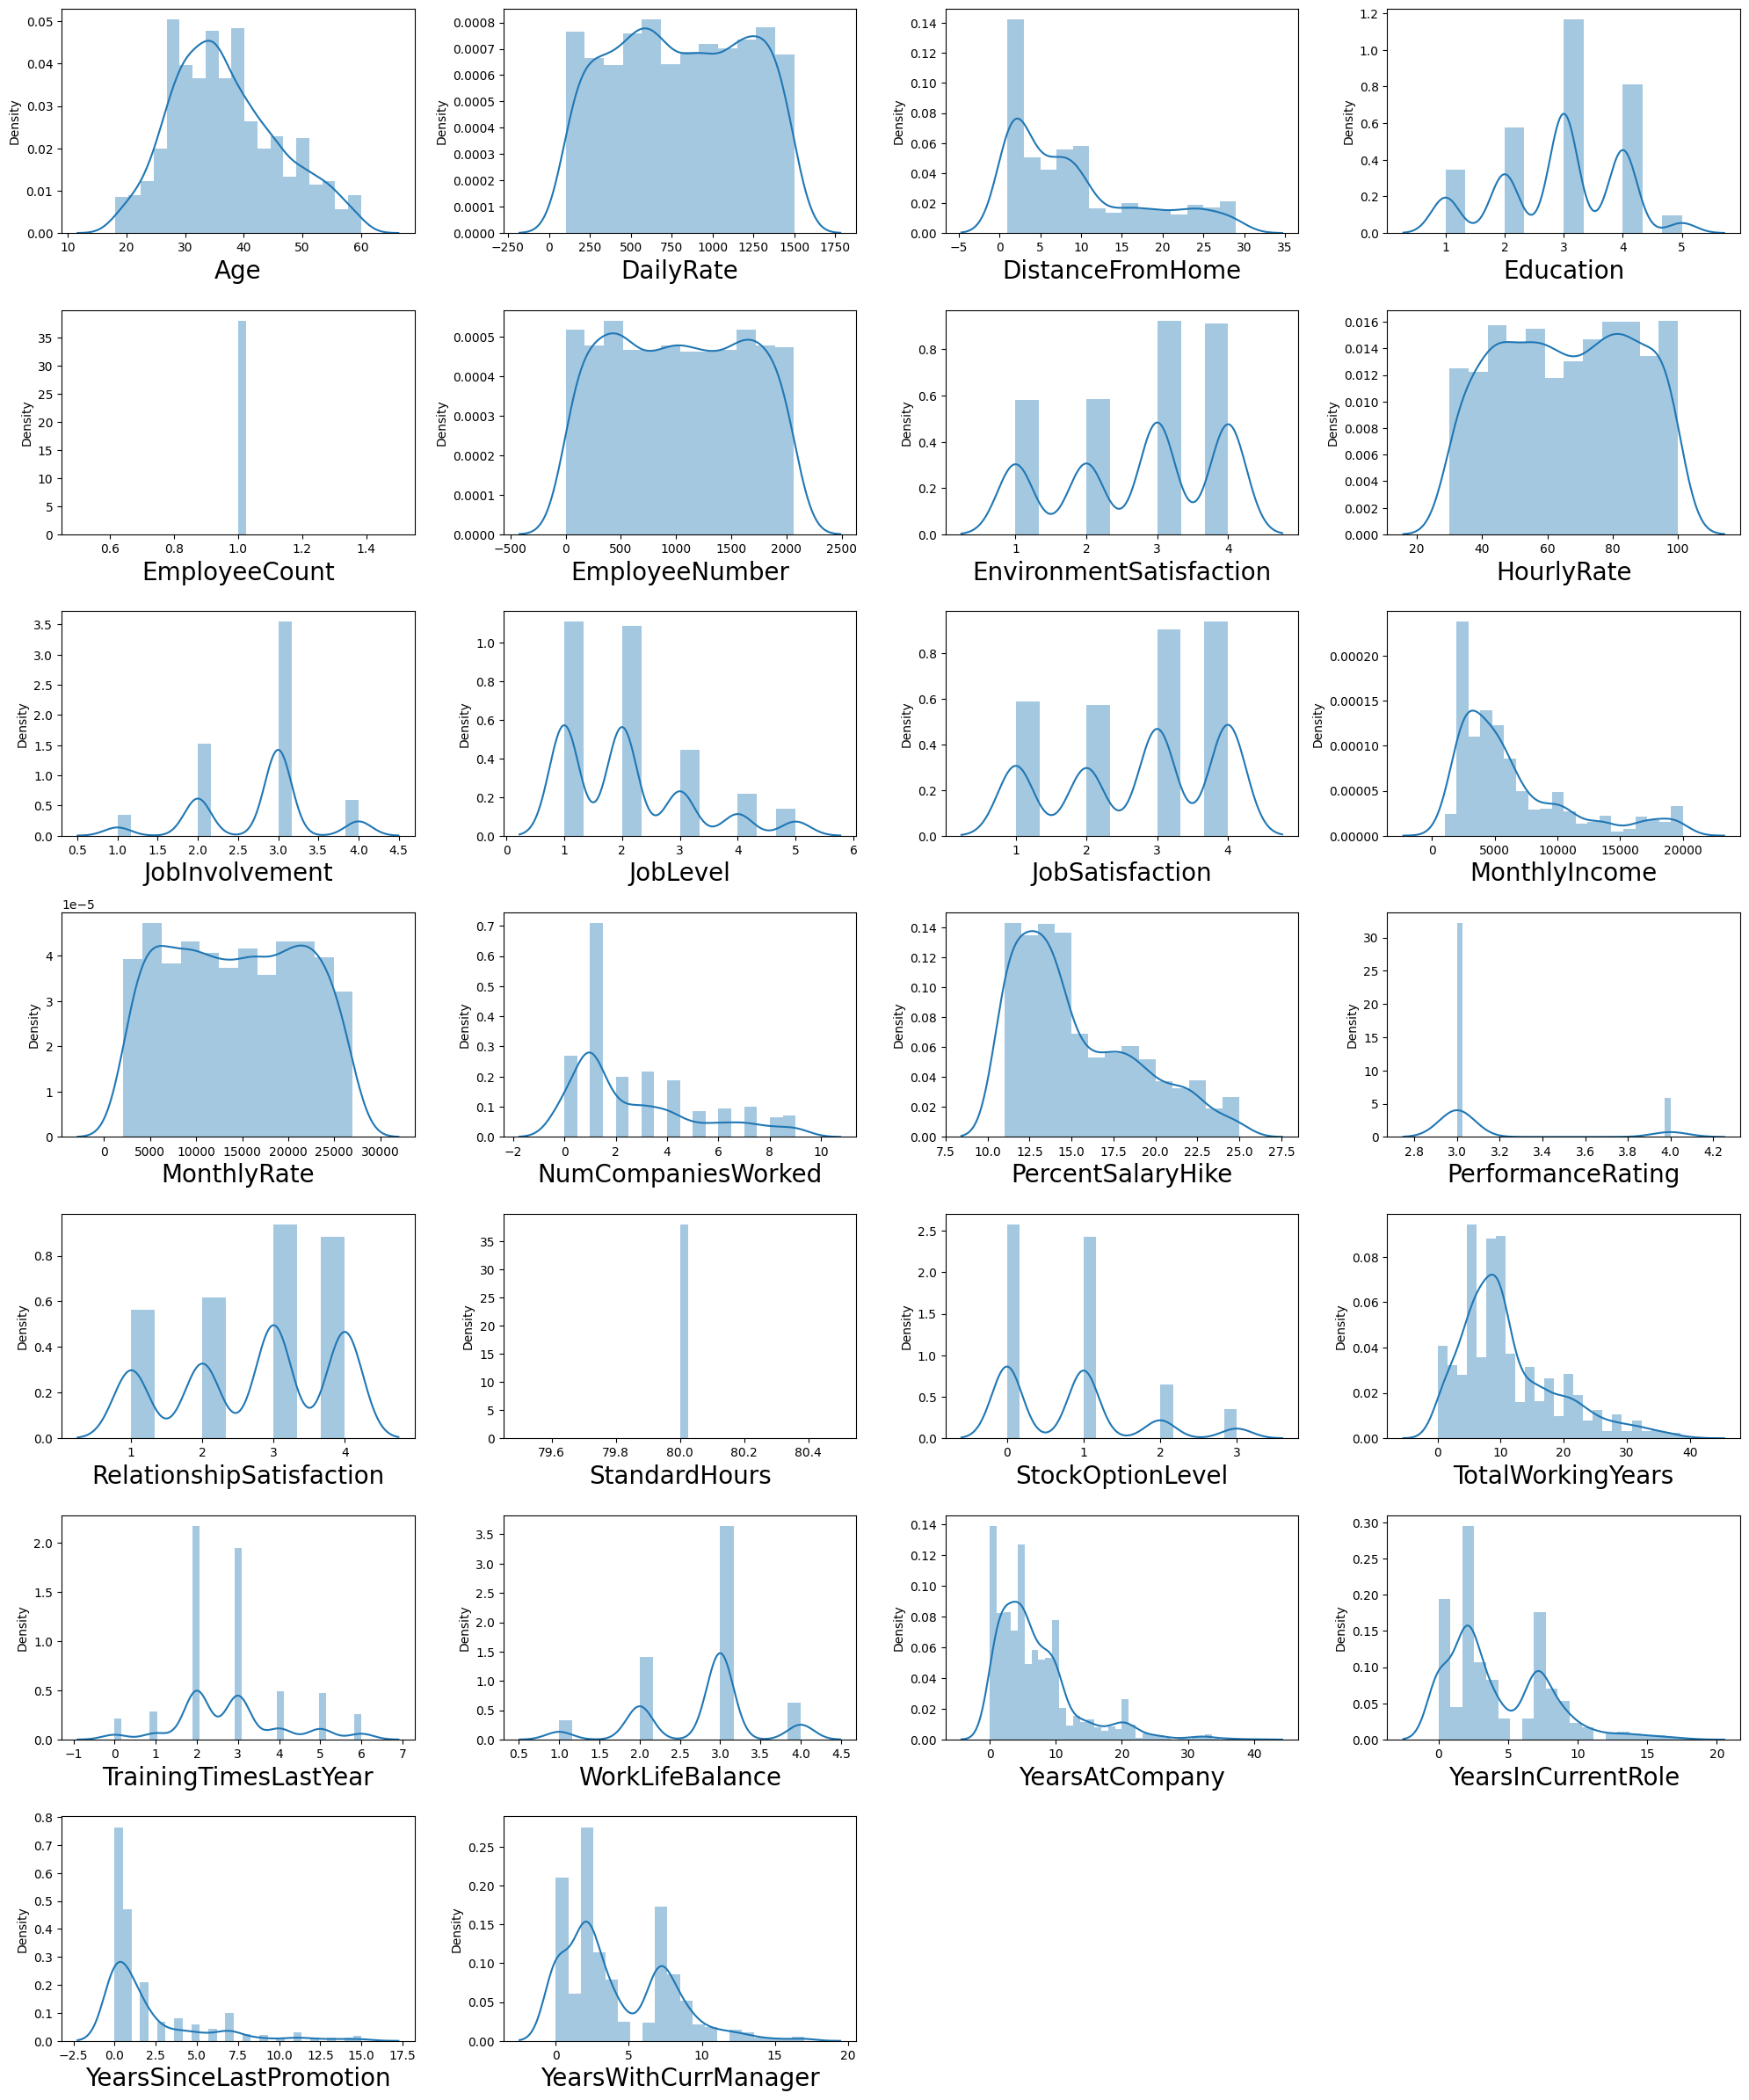

In [17]:
#univariate analysis
plt.figure(figsize=(20,24))
num=1
for col in num_cols:
    if num<=26:
        plt.subplot(7,4,num)
        sns.distplot(x=data[col])
        plt.xlabel(col,fontsize=20)
    num+=1
plt.tight_layout()
    

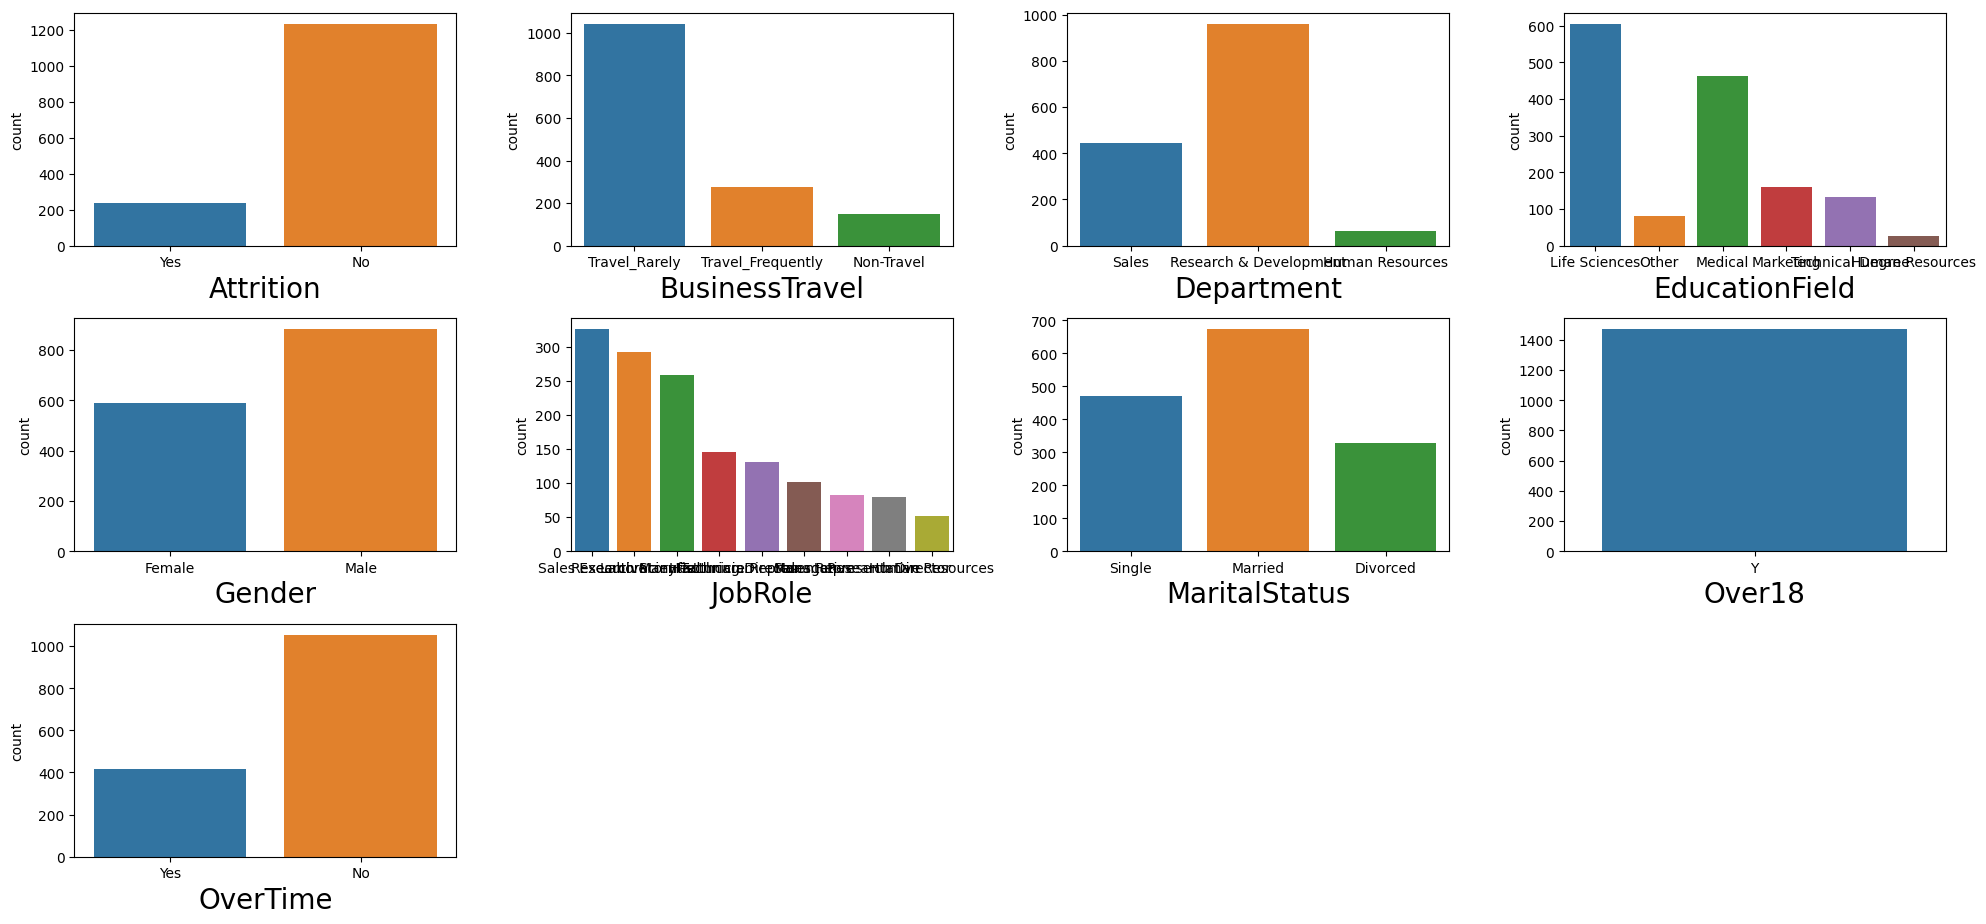

In [18]:

plt.figure(figsize=(20,21))
num=1
for col in cat_cols:
    if num<=26:
        plt.subplot(7,4,num)
        sns.countplot(x=data[col])
        plt.xlabel(col,fontsize=20)
    num+=1
plt.tight_layout()
    

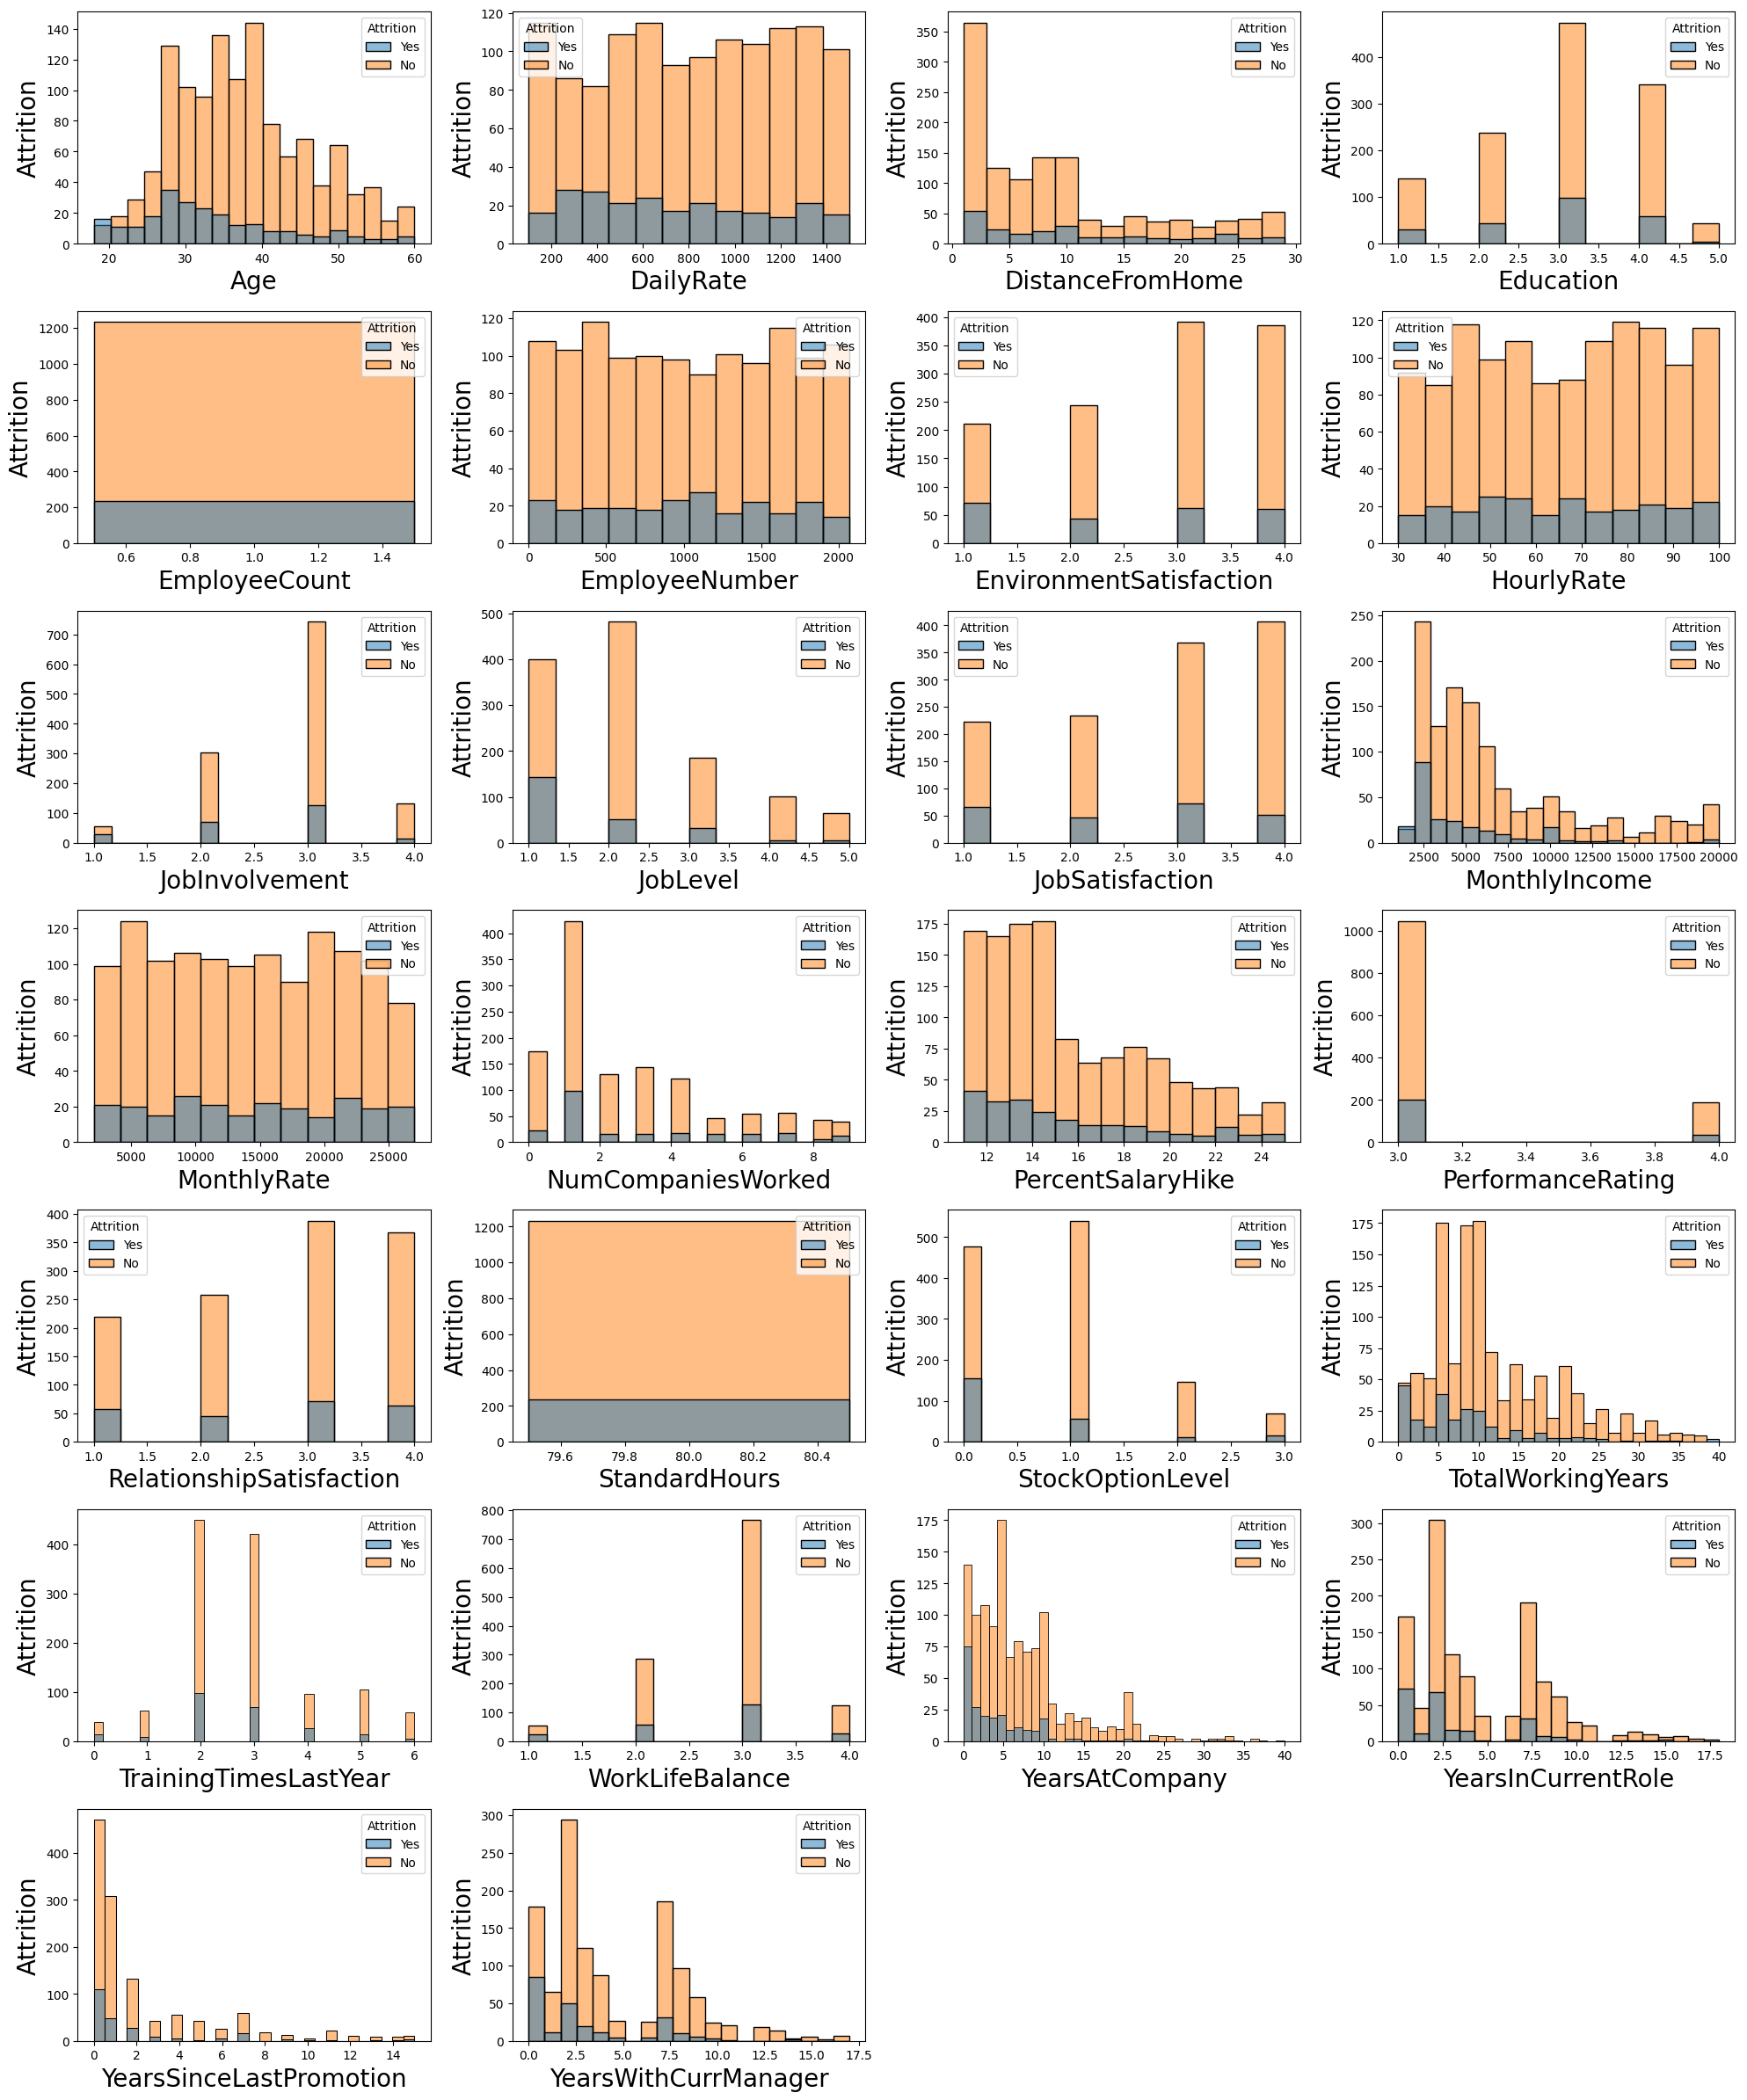

In [19]:
# bivariate anlysis

plt.figure(figsize=(20,24))
num=1
for col in num_cols:
    if num<=26:
        plt.subplot(7,4,num)
        sns.histplot(x=data[col],hue=data["Attrition"])
        plt.xlabel(col,fontsize=20)
        plt.ylabel("Attrition",fontsize=20)
    num+=1
plt.tight_layout()
    


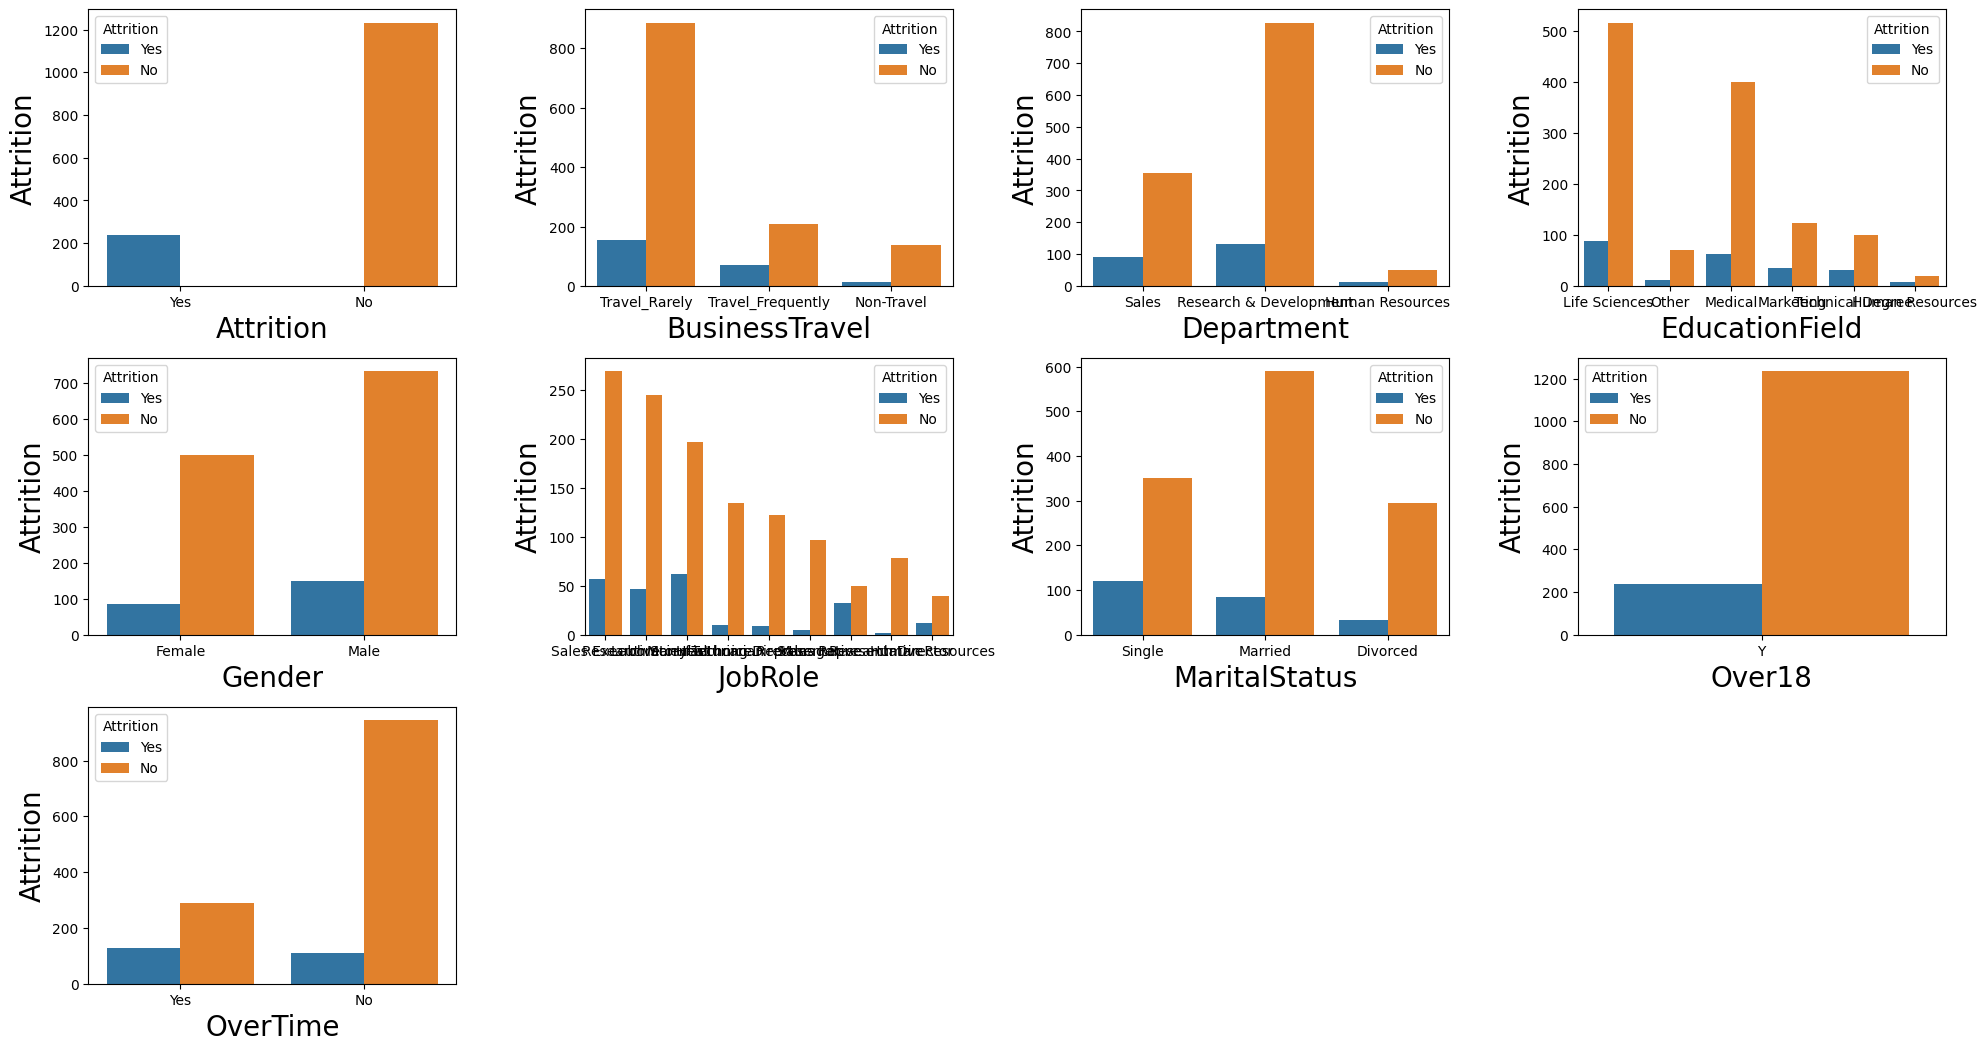

In [20]:

plt.figure(figsize=(20,24))
num=1
for col in cat_cols:
    if num<=26:
        plt.subplot(7,4,num)
        sns.countplot(x=data[col],hue=data["Attrition"])
        plt.xlabel(col,fontsize=20)
        plt.ylabel("Attrition",fontsize=20)
    num+=1
plt.tight_layout()
    

In [21]:
# multivariate
#sns.pairplot(data=num_cols) 

# data Preprocessing

In [22]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
data.duplicated().sum()

0

# checking outliers

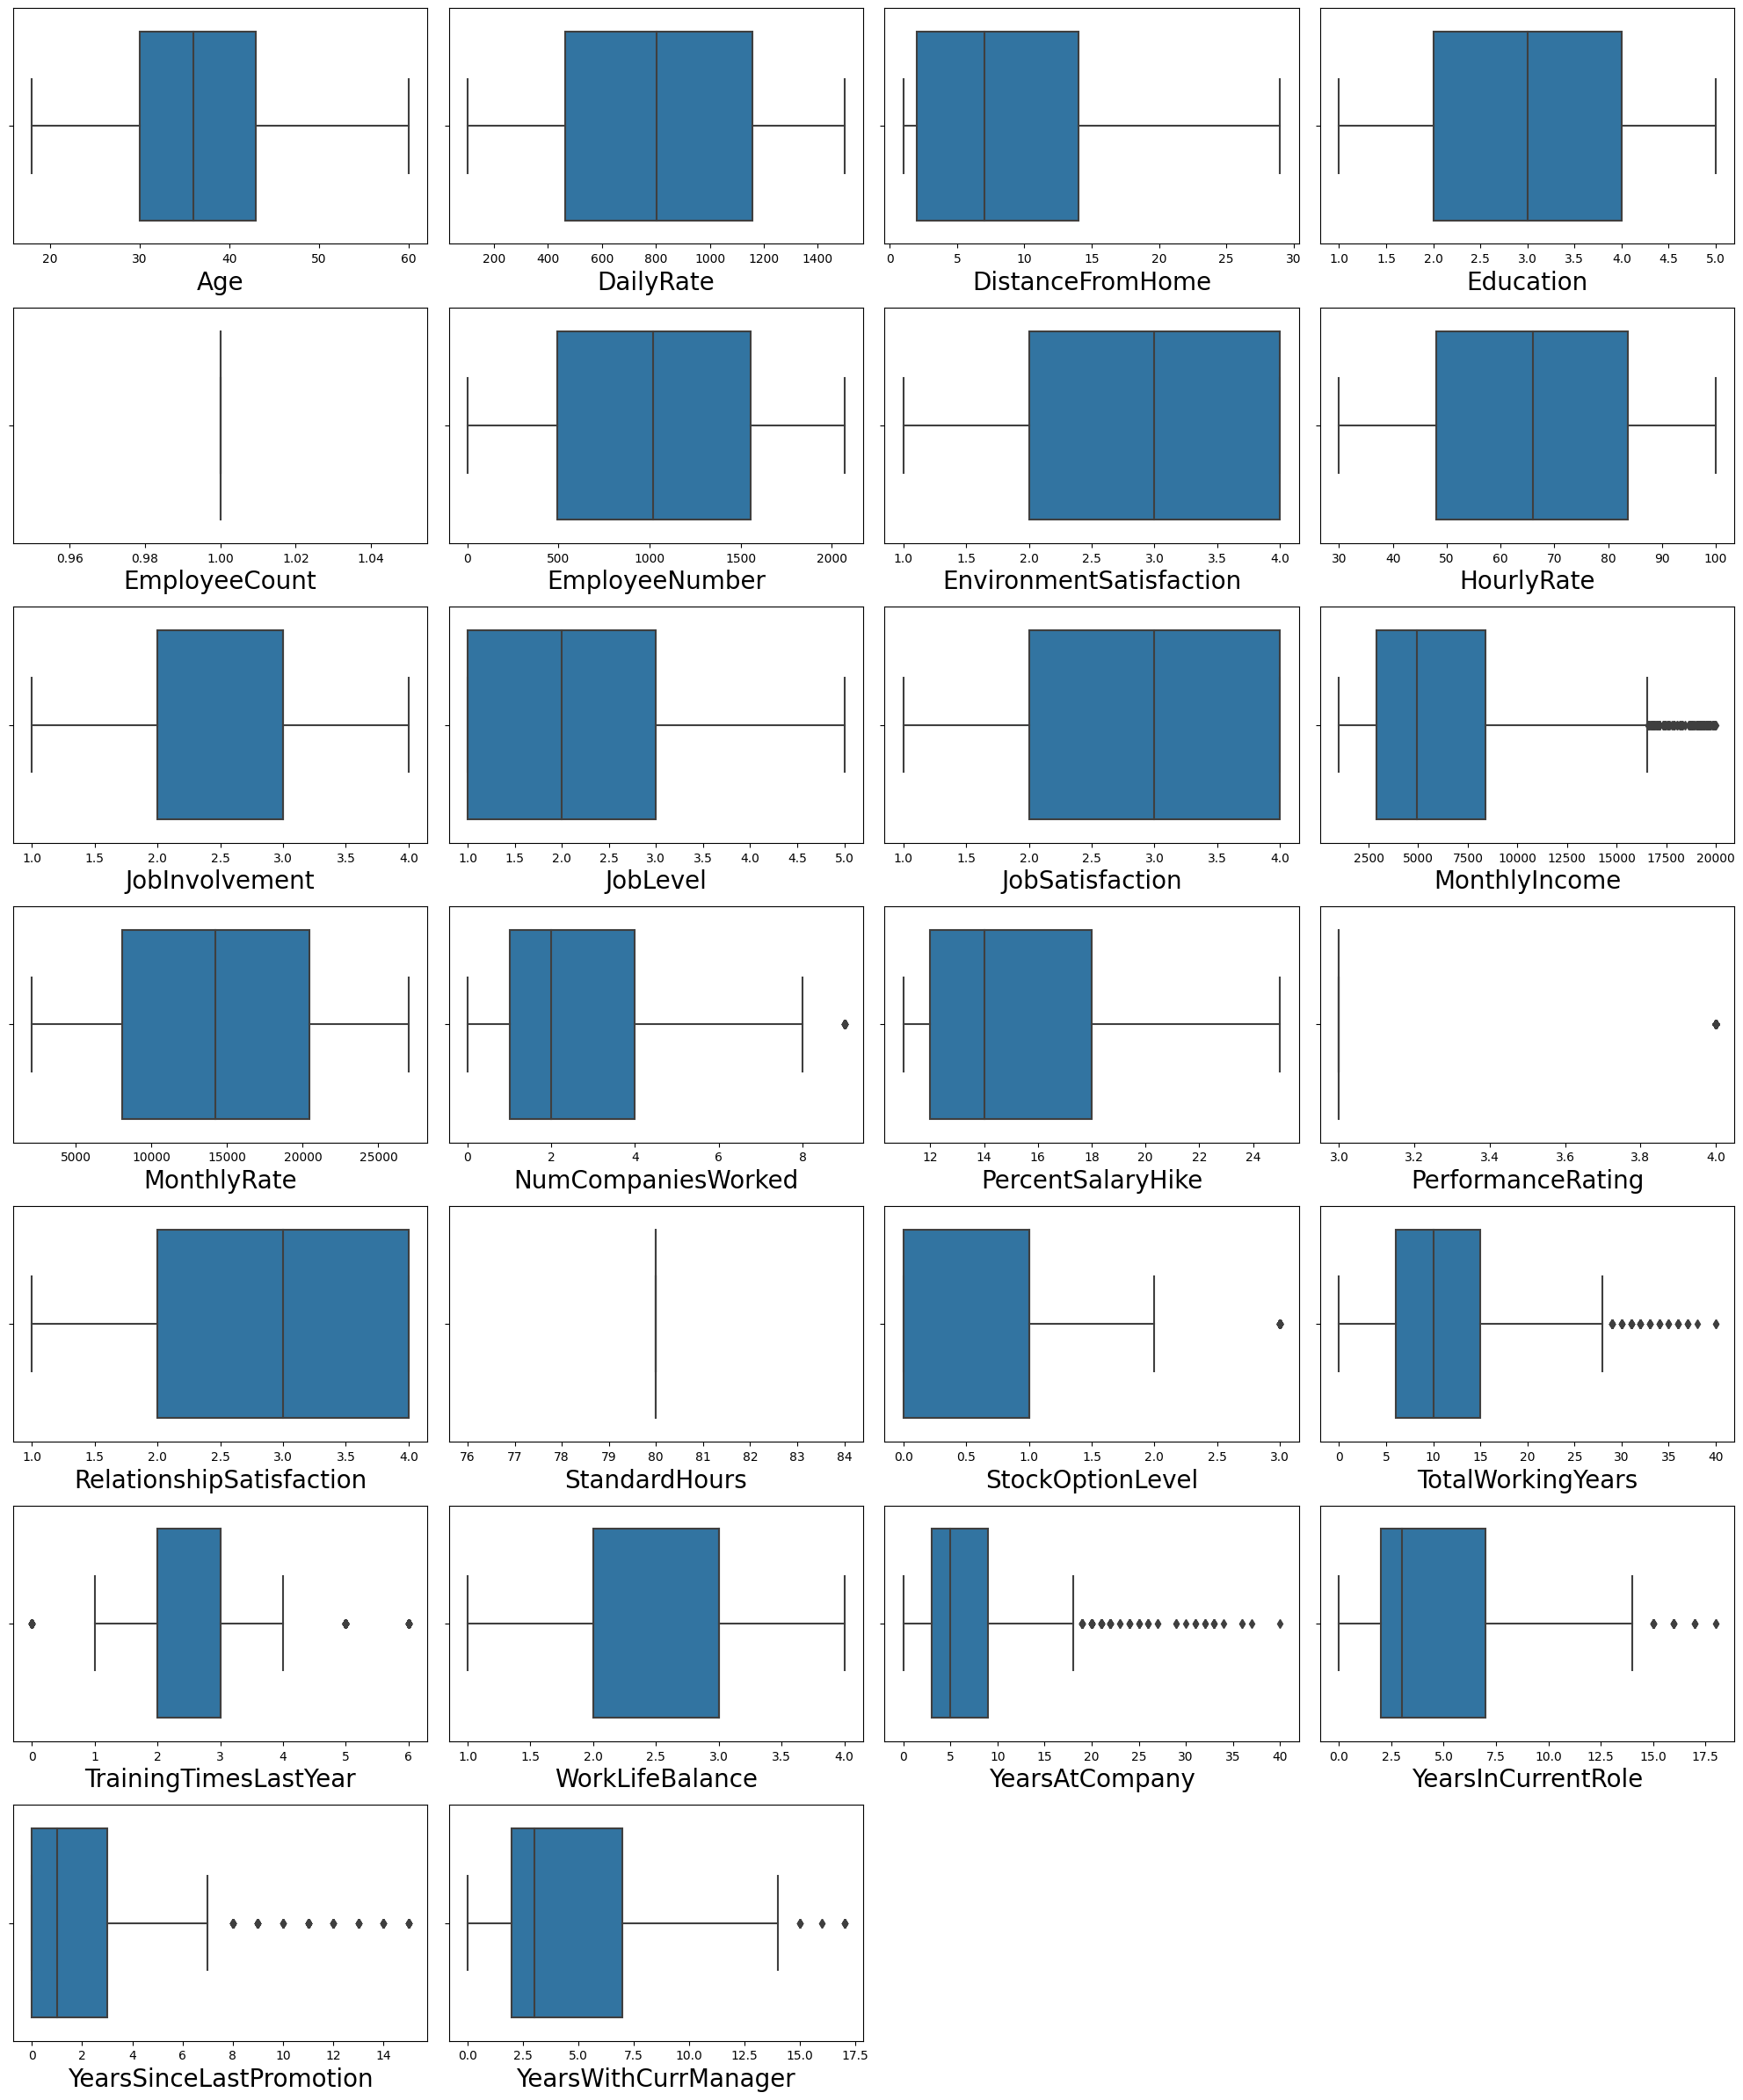

In [24]:

plt.figure(figsize=(20,24))
num=1
for col in num_cols:
    if num<=26:
        plt.subplot(7,4,num)
        sns.boxplot(x=data[col])
        plt.xlabel(col,fontsize=20)
    num+=1
plt.tight_layout()

In [25]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [26]:
outliers=["MonthlyIncome","TotalWorkingYears","TrainingTimesLastYear","YearsInCurrentRole","YearsSinceLastPromotion","YearsAtCompany","YearsWithCurrManager"]
for i in outliers:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    print("********")
    print("column name",i)
    print("IQR",IQR)
    print("lower",lower)
    print("upper",upper)
    per=len(data.loc[(data[i]<lower)|(data[i]>upper)])/len(data) 
    print("percentage of outliers", per)
    print("**** The End *****")

********
column name MonthlyIncome
IQR 5468.0
lower -5291.0
upper 16581.0
percentage of outliers 0.07755102040816327
**** The End *****
********
column name TotalWorkingYears
IQR 9.0
lower -7.5
upper 28.5
percentage of outliers 0.04285714285714286
**** The End *****
********
column name TrainingTimesLastYear
IQR 1.0
lower 0.5
upper 4.5
percentage of outliers 0.1619047619047619
**** The End *****
********
column name YearsInCurrentRole
IQR 5.0
lower -5.5
upper 14.5
percentage of outliers 0.014285714285714285
**** The End *****
********
column name YearsSinceLastPromotion
IQR 3.0
lower -4.5
upper 7.5
percentage of outliers 0.0727891156462585
**** The End *****
********
column name YearsAtCompany
IQR 6.0
lower -6.0
upper 18.0
percentage of outliers 0.0707482993197279
**** The End *****
********
column name YearsWithCurrManager
IQR 5.0
lower -5.5
upper 14.5
percentage of outliers 0.009523809523809525
**** The End *****


# Handling outliers

In [27]:
list=["TotalWorkingYears","YearsInCurrentRole","YearsWithCurrManager"]
for i in list:
    data.loc[(data[i]<lower)|(data[i]>upper),i]=data[i].median()

In [28]:
#checking whether outliers are imputed(check) or not
per=len(data.loc[(data["TotalWorkingYears"]<lower)|(data["TotalWorkingYears"]>upper)])/len(data) 
per

0.0

## Encoding

In [29]:
#Attrition
data["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [30]:

data["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [31]:
#OverTime
data["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
data["OverTime"].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [33]:
data["OverTime"]=data["OverTime"].map({"No":0,'Yes':1})
data["OverTime"].unique()

array([1, 0], dtype=int64)

In [34]:
data["Attrition"]=data["Attrition"].map({"No":0,'Yes':1})
data["Attrition"].unique()

array([1, 0], dtype=int64)

In [35]:
#BusinessTravel
data["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [36]:
data["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [37]:
data["BusinessTravel"]=data["BusinessTravel"].map({"Travel_Rarely":0,'Travel_Frequently':1,"Non-Travel":2})
data["BusinessTravel"].unique()

array([0, 1, 2], dtype=int64)

In [38]:
#Department
data["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [39]:
data["Department"]=data["Department"].map({"Sales":0,'Human Resources':1,"Research & Development":2})
data["Department"].unique()

array([0, 2, 1], dtype=int64)

In [40]:
#Educationfield
data["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [41]:
data["EducationField"]=data["EducationField"].map({"Life Sciences":0,'Other':1,"Medical":2,"Marketing":3,"Technical Degree":4,"Human Resources":5})
data["EducationField"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [42]:
#Gender
data["Gender"].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [43]:
data["Gender"]=data["Gender"].map({"Female":0,"Male":1})
data["Gender"].unique()

array([0, 1], dtype=int64)

In [44]:
#JobRole
data["JobRole"].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [45]:
data["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [46]:
data["JobRole"]=data["JobRole"].map({"Sales Executive":0,'Research Scientist':1,"Laboratory Technician":2,"Manufacturing Director":3,"Healthcare Representative":4,"Manager":5,"Sales Representative":6,"Research Director":7,"Human Resources":8})
data["JobRole"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [47]:
#Marrital Status

In [48]:
data["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [49]:
data["MaritalStatus"]=data["MaritalStatus"].map({'Single':0,'Married':1,'Divorced':2})


In [50]:
data['MaritalStatus'].unique()

array([0, 1, 2], dtype=int64)

In [51]:
data["Over18"]=data["Over18"].map({'Y':1})


In [52]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,802.485714,1.350340,9.192517,2.912925,1.462585,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.553061,2.728571,0.902721,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,8.040816,2.799320,2.761224,7.008163,4.043537,2.187755,3.997959
std,9.135373,0.367863,0.665455,403.509100,0.913768,8.106864,1.024165,1.431780,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.323902,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,3.175548,1.289271,0.706476,6.126525,3.334660,3.222430,3.367950
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,2.000000,0.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.000000,802.000000,2.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,2.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,2.000000,14.000000,4.000000,2.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,14.000000,6.000000,4.000000,40.000000,14.000000,15.000000,14.000000


In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,0.392517,0.665455,0.0,0.00,0.0,1.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.350340,0.913768,0.0,0.00,2.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,1.462585,1.431780,0.0,0.00,2.0,2.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [54]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['MonthlyIncome','MonthlyRate','DailyRate']]=scale.fit_transform(data[['MonthlyIncome','MonthlyRate','DailyRate']])

In [55]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,0.715820,0,1,2,0,1,1,2,0,94,3,2,0,4,0,0.262454,0.698053,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,0.126700,2,8,1,0,1,2,3,1,61,2,2,1,2,1,0.217009,0.916001,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0,0.909807,2,2,2,1,1,4,4,1,92,2,1,2,3,0,0.056925,0.012126,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,0.923407,2,3,4,0,1,5,4,0,56,3,1,1,3,1,0.100053,0.845814,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0,0.350036,2,2,1,2,1,7,1,1,40,3,1,2,2,1,0.129489,0.583738,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,0.559771,2,23,2,2,1,2061,3,1,41,4,2,2,4,1,0.082254,0.409396,4,1,0,17,3,3,80,1,10,3,3,5,2,0,3
1466,39,0,0,0.365784,2,6,1,2,1,2062,4,1,42,2,3,4,1,1,0.472986,0.777474,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,0.037938,2,4,3,0,1,2064,2,1,87,4,2,3,2,1,0.270300,0.123670,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,0.659270,0,2,3,2,1,2065,4,1,63,2,2,0,2,1,0.230700,0.447661,2,1,0,14,3,4,80,0,10,3,2,9,6,0,8


In [56]:
data['MonthlyIncome'].std()

0.24791768210100018

# Feature Engineering 

<Axes: >

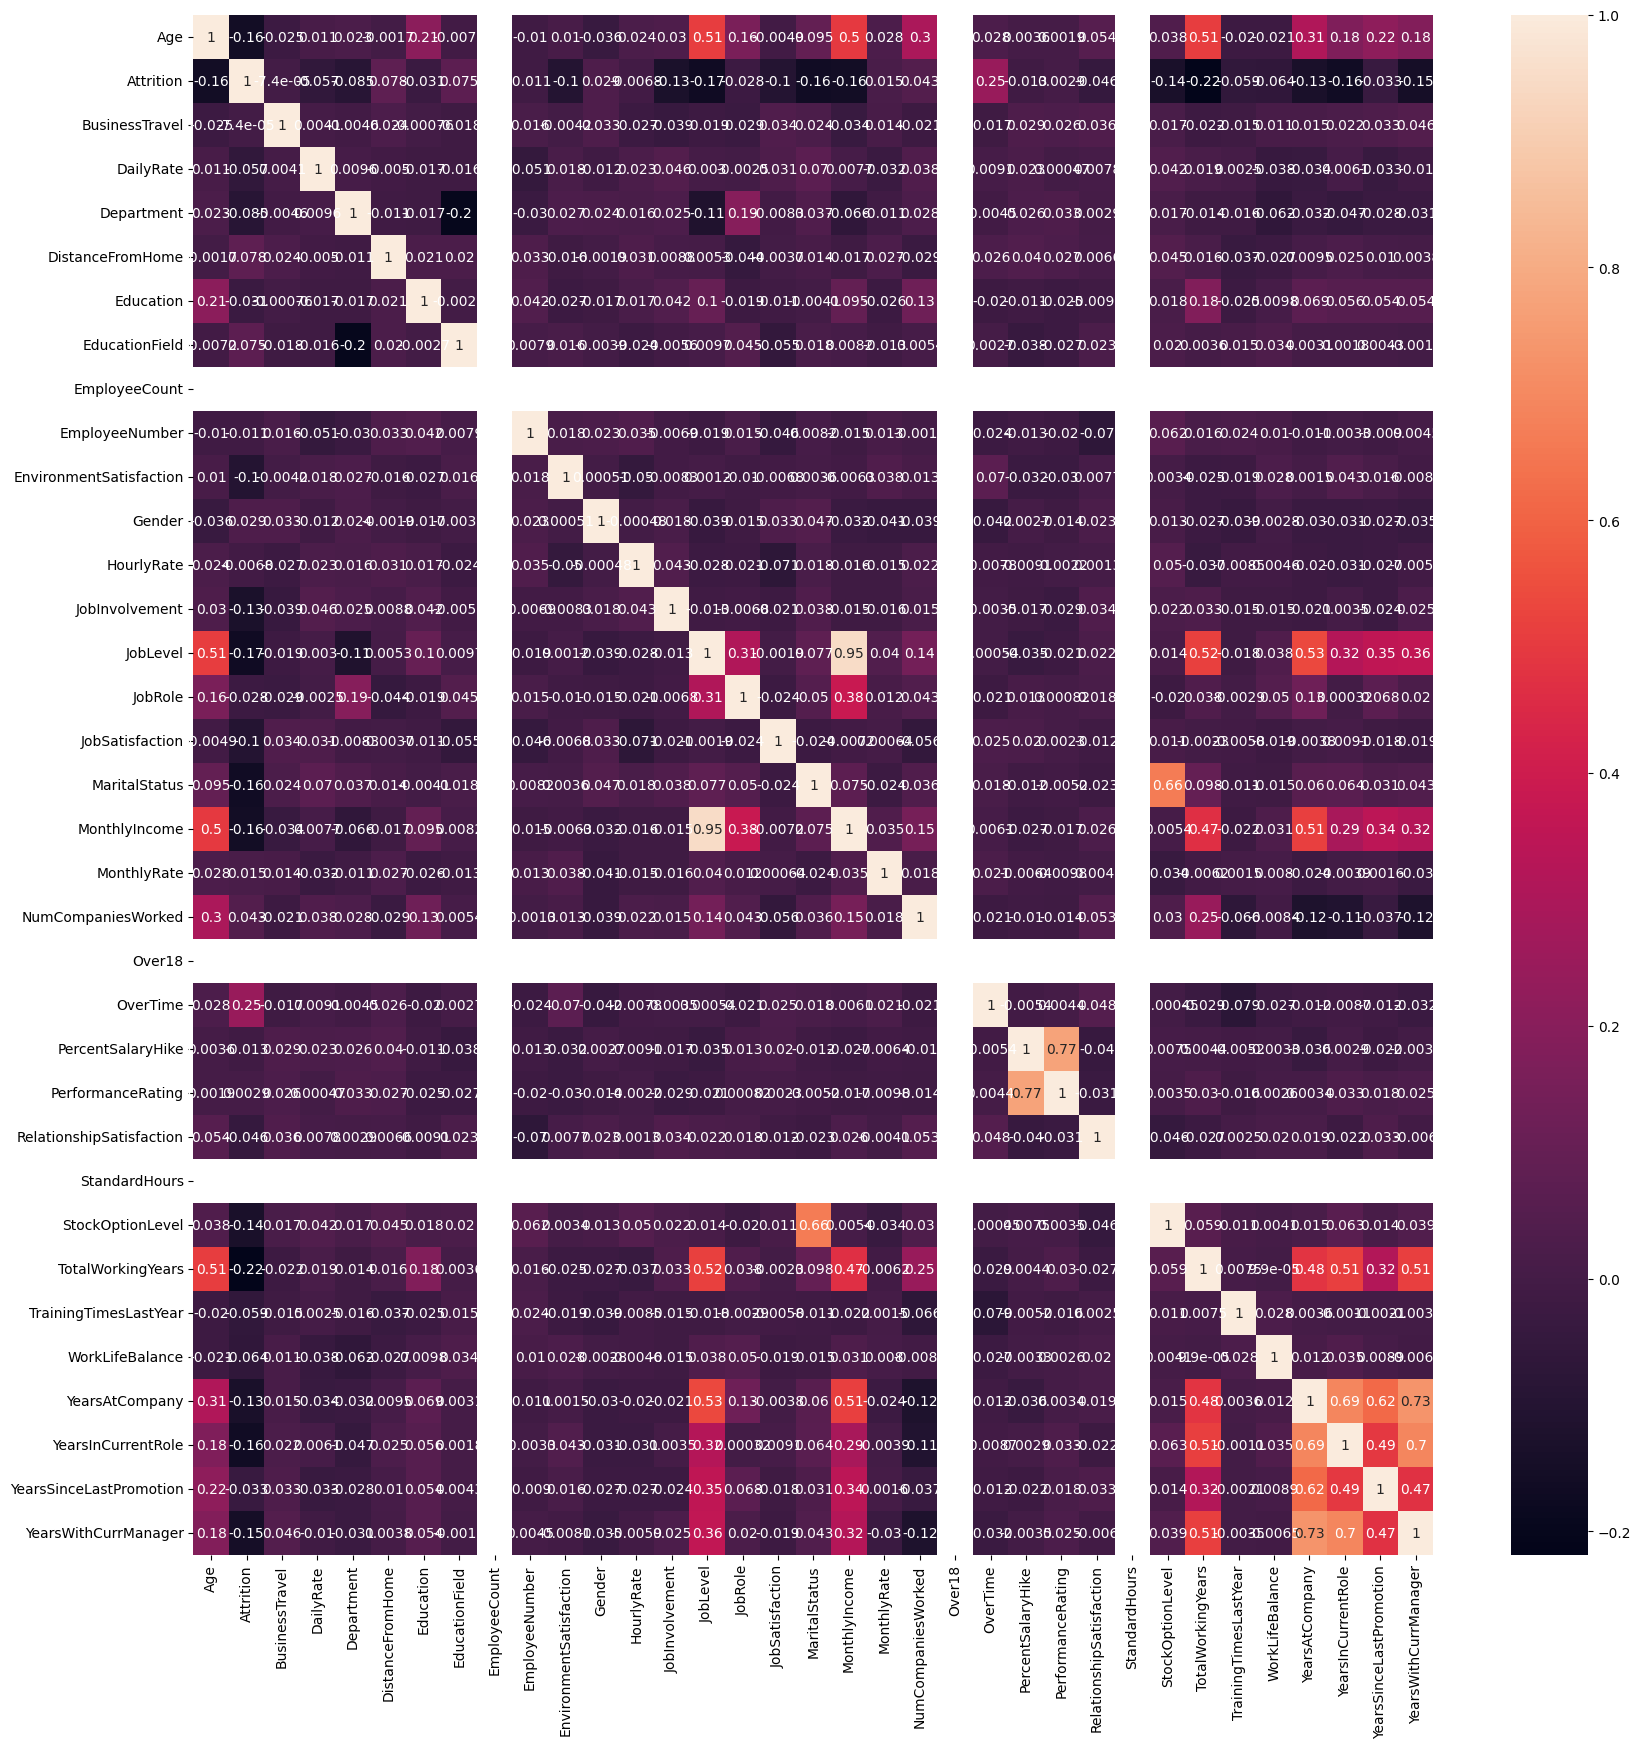

In [57]:
plt.figure(figsize=(20,20))
num_cols=data.select_dtypes(include=(["int64","float64"]))

sns.heatmap(num_cols.corr(),annot=True)

In [58]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,0.715820,0,1,2,0,1,1,2,0,94,3,2,0,4,0,0.262454,0.698053,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,0.126700,2,8,1,0,1,2,3,1,61,2,2,1,2,1,0.217009,0.916001,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0,0.909807,2,2,2,1,1,4,4,1,92,2,1,2,3,0,0.056925,0.012126,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,0.923407,2,3,4,0,1,5,4,0,56,3,1,1,3,1,0.100053,0.845814,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0,0.350036,2,2,1,2,1,7,1,1,40,3,1,2,2,1,0.129489,0.583738,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,0.559771,2,23,2,2,1,2061,3,1,41,4,2,2,4,1,0.082254,0.409396,4,1,0,17,3,3,80,1,10,3,3,5,2,0,3
1466,39,0,0,0.365784,2,6,1,2,1,2062,4,1,42,2,3,4,1,1,0.472986,0.777474,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,0.037938,2,4,3,0,1,2064,2,1,87,4,2,3,2,1,0.270300,0.123670,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,0.659270,0,2,3,2,1,2065,4,1,63,2,2,0,2,1,0.230700,0.447661,2,1,0,14,3,4,80,0,10,3,2,9,6,0,8


In [59]:
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

# Feature Selection 

In [60]:
x=data.drop('Attrition',axis=1)
y=data['Attrition']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [62]:
# data is inbalance performing smote operation
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

#  Model Creation 

# Logistics Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_smote,y_smote)

LogisticRegression()

In [64]:
LR_pred=LR.predict(x_test)

## Evaluation 

In [65]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,LR_pred)

0.717391304347826

### KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_smote,y_smote)

KNeighborsClassifier()

# knn_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score()

## Evaluatioin 

In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_smote,y_smote)

SVC()

In [68]:
svc_pred=svc.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svc_pred)

0.48097826086956524

In [70]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=LR,n_estimators=200)
model_bag.fit(x_smote,y_smote)


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model=GradientBoostingClassifier(n_estimators=100)
gboost_model.fit(x_smote,y_smote)

GradientBoostingClassifier()

In [74]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_smote,y_smote)

GaussianNB()